In [306]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
import xgboost as xgb

In [201]:
from pathlib import Path

In [202]:
print(Path.cwd())

C:\Users\USER\Desktop\Python Projects\ml-studies\src\ml_studies


In [203]:
dataset_dir = Path.cwd()

In [204]:
csv_file_path = dataset_dir / "datasets" / "Ecommerce_Consumer_Behavior_Analysis_Data.csv"

In [205]:
df = pd.read_csv(csv_file_path)

In [ ]:
# General analysis of the dataset

In [247]:
df.head()

,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,22,Female,Middle,Married,Bachelor's,Middle,Gardening & Outdoors,333.80,4,Mixed,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,49,Male,High,Married,High School,High,Food & Beverages,222.22,11,In-Store,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,24,Female,Middle,Single,Master's,High,Office Supplies,426.22,2,Mixed,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,29,Female,Middle,Single,Master's,Middle,Home Appliances,101.31,6,Mixed,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,33,Female,Middle,Widowed,High School,Middle,Furniture,211.70,6,Mixed,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [248]:
df.tail()

,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
995,44,Female,High,Divorced,Bachelor's,High,Mobile Accessories,463.67,5,Online,...,4,NaN,Tablet,PayPal,7/7/2024,True,False,Need-based,Standard,5
996,50,Female,High,Single,High School,Middle,Gardening & Outdoors,69.78,9,Mixed,...,6,Low,Tablet,Cash,3/28/2024,True,False,Wants-based,No Preference,9
997,26,Male,High,Married,Bachelor's,High,Food & Beverages,453.37,10,Mixed,...,6,High,Desktop,Credit Card,3/11/2024,True,True,Wants-based,Express,9
998,21,Female,High,Widowed,Bachelor's,Middle,Baby Products,106.15,12,In-Store,...,5,Medium,Desktop,Cash,3/30/2024,True,True,Impulsive,Standard,8
999,21,Female,Middle,Single,High School,High,Health Care,378.47,6,Online,...,10,Low,Tablet,Other,12/8/2024,False,False,Planned,Express,2


In [258]:
df.shape

(1000, 26)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    1000 non-null   int64  
 1   Gender                                 1000 non-null   object 
 2   Income_Level                           1000 non-null   object 
 3   Marital_Status                         1000 non-null   object 
 4   Education_Level                        1000 non-null   object 
 5   Occupation                             1000 non-null   object 
 6   Purchase_Category                      1000 non-null   object 
 7   Purchase_Amount                        1000 non-null   float64
 8   Frequency_of_Purchase                  1000 non-null   int64  
 9   Purchase_Channel                       1000 non-null   object 
 10  Brand_Loyalty                          1000 non-null   int64  
 11  Produ

In [251]:
df.isna().any(axis=1).sum()

np.int64(436)

In [254]:
df.isnull().sum()

Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                             0
Time_of_Purchase                           0
Discount_Used                              0
Customer_L

In [252]:
df.columns[df.isna().any()].tolist()

['Social_Media_Influence', 'Engagement_with_Ads']

In [260]:
df.columns

Index(['Age', 'Gender', 'Income_Level', 'Marital_Status', 'Education_Level',
       'Occupation', 'Purchase_Category', 'Purchase_Amount',
       'Frequency_of_Purchase', 'Purchase_Channel', 'Brand_Loyalty',
       'Product_Rating', 'Time_Spent_on_Product_Research(hours)',
       'Social_Media_Influence', 'Discount_Sensitivity', 'Return_Rate',
       'Customer_Satisfaction', 'Engagement_with_Ads',
       'Device_Used_for_Shopping', 'Payment_Method', 'Time_of_Purchase',
       'Discount_Used', 'Customer_Loyalty_Program_Member', 'Purchase_Intent',
       'Shipping_Preference', 'Time_to_Decision'],
      dtype='object')

In [212]:
for column in df.columns:
    print(f" Column type: {df[column].dtypes}")
    print(f" Column: {df[column].value_counts().sort_index()}")
    print("________")
    

 Column type: object
 Column: Customer_ID
00-107-4749    1
00-149-4481    1
00-264-3797    1
00-265-0556    1
00-275-9990    1
              ..
99-509-4653    1
99-581-5577    1
99-643-9845    1
99-771-9310    1
99-945-7193    1
Name: count, Length: 1000, dtype: int64
________
 Column type: int64
 Column: Age
18    20
19    32
20    19
21    35
22    19
23    33
24    32
25    32
26    34
27    43
28    24
29    37
30    27
31    27
32    30
33    26
34    30
35    30
36    31
37    38
38    33
39    27
40    38
41    30
42    34
43    27
44    29
45    33
46    27
47    27
48    27
49    35
50    34
Name: count, dtype: int64
________
 Column type: object
 Column: Gender
Agender         19
Bigender        20
Female         452
Genderfluid     17
Genderqueer     12
Male           449
Non-binary      16
Polygender      15
Name: count, dtype: int64
________
 Column type: object
 Column: Income_Level
High      515
Middle    485
Name: count, dtype: int64
________
 Column type: object
 Colum

In [ ]:
# Removes useless columns

In [213]:
df = df.drop(columns=['Customer_ID', 'Location'])

In [261]:
df.head()

,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,22,Female,Middle,Married,Bachelor's,Middle,Gardening & Outdoors,333.80,4,Mixed,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,49,Male,High,Married,High School,High,Food & Beverages,222.22,11,In-Store,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,24,Female,Middle,Single,Master's,High,Office Supplies,426.22,2,Mixed,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,29,Female,Middle,Single,Master's,Middle,Home Appliances,101.31,6,Mixed,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,33,Female,Middle,Widowed,High School,Middle,Furniture,211.70,6,Mixed,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [ ]:
# Transforms string numeric values in float

In [215]:
def object_to_float(df, column):

    try:
        df[column] = df[column].str.replace('$', '', regex=False).astype(float)
        return df
    except (AttributeError, ValueError):
        print(f"Could not convert '{column}' to float, check column's '{column}' format.")  
        return df

In [216]:
df = object_to_float(df, 'Purchase_Amount') 

In [262]:
df['Purchase_Amount'].dtype

dtype('float64')

In [263]:
df['Purchase_Amount'].head()

0    333.80
1    222.22
2    426.22
3    101.31
4    211.70
Name: Purchase_Amount, dtype: float64

In [ ]:
# Checks if data follows normal distribution

In [ ]:
# Uses D'Agostine-Pearson Test due to dataset size (1000 rows)

In [219]:
def normal_distribution_check(data):
    try:
        stat, p = normaltest(data)
        print(f"D'Agostino-Pearson Test: ")
        print(f"Stat: {stat}")
        print(f"p-value: {p}")
        if is_numeric_dtype(df[column]):
            plt.figure(figsize=(3,2))
            sns.histplot(df[column], kde=True)
            plt.show()
        print("_" * 20 + "\n")
    except (ValueError, AttributeError, TypeError):
        print("Could not perform the test. Check the type of the column's data. \n")
    

Age
D'Agostino-Pearson Test: 
Stat: 608.9693582259446
p-value: 5.807430714460437e-133


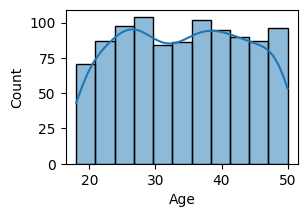

____________________

Gender
Could not perform the test. Check the type of the column's data. 

Income_Level
Could not perform the test. Check the type of the column's data. 

Marital_Status
Could not perform the test. Check the type of the column's data. 

Education_Level
Could not perform the test. Check the type of the column's data. 

Occupation
Could not perform the test. Check the type of the column's data. 

Purchase_Category
Could not perform the test. Check the type of the column's data. 

Purchase_Amount
D'Agostino-Pearson Test: 
Stat: 811.9122402515461
p-value: 4.960176546585437e-177


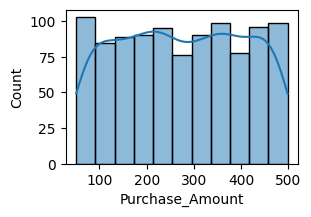

____________________

Frequency_of_Purchase
D'Agostino-Pearson Test: 
Stat: 785.4202950442956
p-value: 2.8064024040706726e-171


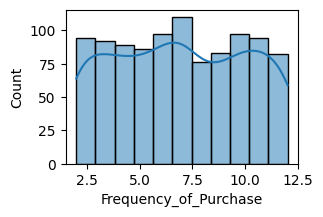

____________________

Purchase_Channel
Could not perform the test. Check the type of the column's data. 

Brand_Loyalty
D'Agostino-Pearson Test: 
Stat: 2036.9175038084545
p-value: 0.0


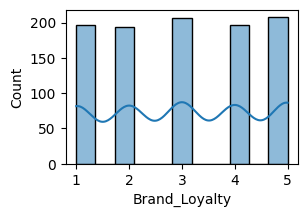

____________________

Product_Rating
D'Agostino-Pearson Test: 
Stat: 5278.015351799029
p-value: 0.0


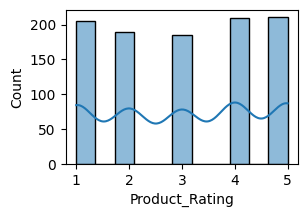

____________________

Time_Spent_on_Product_Research(hours)
D'Agostino-Pearson Test: 
Stat: 10401.879849832878
p-value: 0.0


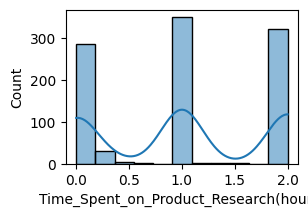

____________________

Social_Media_Influence
D'Agostino-Pearson Test: 
Stat: nan
p-value: nan
____________________

Discount_Sensitivity
Could not perform the test. Check the type of the column's data. 

Return_Rate
D'Agostino-Pearson Test: 
Stat: 8054.768696521714
p-value: 0.0


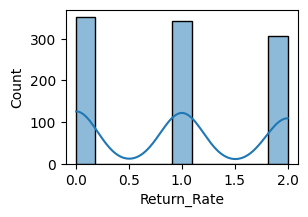

____________________

Customer_Satisfaction
D'Agostino-Pearson Test: 
Stat: 984.2659834131358
p-value: 1.8593336933387618e-214


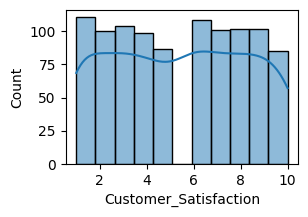

____________________

Engagement_with_Ads
D'Agostino-Pearson Test: 
Stat: nan
p-value: nan
____________________

Device_Used_for_Shopping
Could not perform the test. Check the type of the column's data. 

Payment_Method
Could not perform the test. Check the type of the column's data. 

Time_of_Purchase
Could not perform the test. Check the type of the column's data. 

Discount_Used
Could not perform the test. Check the type of the column's data. 

Customer_Loyalty_Program_Member
Could not perform the test. Check the type of the column's data. 

Purchase_Intent
Could not perform the test. Check the type of the column's data. 

Shipping_Preference
Could not perform the test. Check the type of the column's data. 

Time_to_Decision
D'Agostino-Pearson Test: 
Stat: 625.0844312785257
p-value: 1.839248396353315e-136


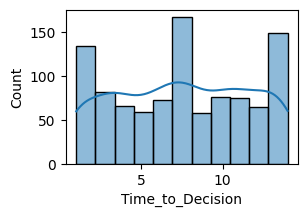

____________________



In [220]:
for column in df.columns:
    print(column)
    normal_distribution_check(df[column])  
    

In [ ]:
# Data doesn't follow normal distribution

In [ ]:
# Checks for outliers via boxplotting (skipping quartile analysis for sake of simplicity, this is a synthetic, poorly formed dataset)

In [221]:
def outlier_check(data):
    try:
        if is_numeric_dtype(df[column]):
            plt.figure(figsize=(3,2))
            sns.boxplot(data=df[column])
            plt.show()
        print("_" * 20 + "\n")
    except (ValueError, AttributeError, TypeError):
        print("Could not perform the test. Check the type of the column's data. \n")
    

Age


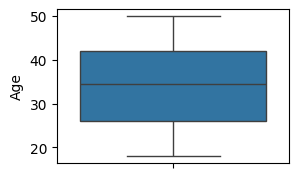

____________________

Gender
____________________

Income_Level
____________________

Marital_Status
____________________

Education_Level
____________________

Occupation
____________________

Purchase_Category
____________________

Purchase_Amount


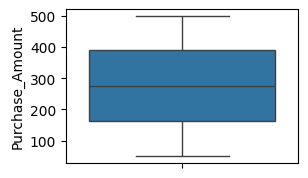

____________________

Frequency_of_Purchase


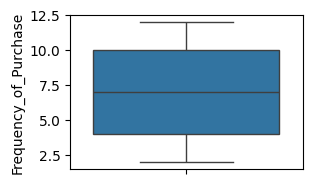

____________________

Purchase_Channel
____________________

Brand_Loyalty


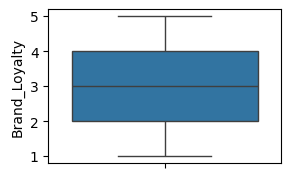

____________________

Product_Rating


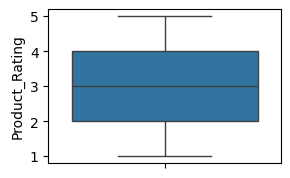

____________________

Time_Spent_on_Product_Research(hours)


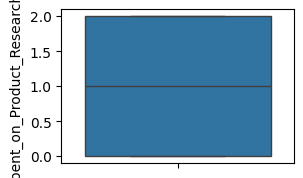

____________________

Social_Media_Influence
____________________

Discount_Sensitivity
____________________

Return_Rate


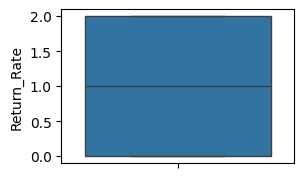

____________________

Customer_Satisfaction


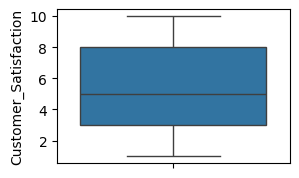

____________________

Engagement_with_Ads
____________________

Device_Used_for_Shopping
____________________

Payment_Method
____________________

Time_of_Purchase
____________________

Discount_Used


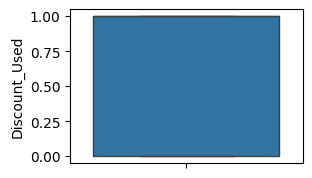

____________________

Customer_Loyalty_Program_Member


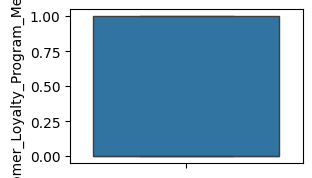

____________________

Purchase_Intent
____________________

Shipping_Preference
____________________

Time_to_Decision


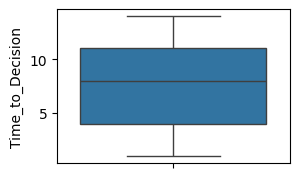

____________________



In [222]:
for column in df.columns:
    print(column)
    outlier_check(df[column])  

In [ ]:
# No outliers found

In [ ]:
# Checks data for correlations via Kendall and Spearman methods, since data does not follow normal distribution

In [244]:
def correlation_check(data):

    df_spearman_corr = data.corr(method='spearman', numeric_only=True)
    df_kendall_corr = data.corr(method='kendall', numeric_only=True)
    print("Spearman Correlation:")
    print(df_spearman_corr)
    sns.heatmap(df_spearman_corr, annot=True, cmap='coolwarm', fmt='.1f')
    plt.show()
    print("_" *100 + "\n")
    print("Kendall Correlation:")
    print(df_kendall_corr)
    sns.heatmap(df_kendall_corr, annot=True, cmap='coolwarm', fmt='.1f')
    plt.show()

    
    

Spearman Correlation:
                                            Age  Purchase_Amount  \
Age                                    1.000000        -0.016181   
Purchase_Amount                       -0.016181         1.000000   
Frequency_of_Purchase                 -0.046899         0.001379   
Brand_Loyalty                         -0.012292        -0.074214   
Product_Rating                         0.010512         0.014607   
Time_Spent_on_Product_Research(hours)  0.000054        -0.021065   
Return_Rate                            0.030697        -0.020365   
Customer_Satisfaction                 -0.004685        -0.021683   
Discount_Used                          0.007458        -0.008200   
Customer_Loyalty_Program_Member       -0.009862        -0.102942   
Time_to_Decision                       0.004180         0.013842   

                                       Frequency_of_Purchase  Brand_Loyalty  \
Age                                                -0.046899      -0.012292   
Pur

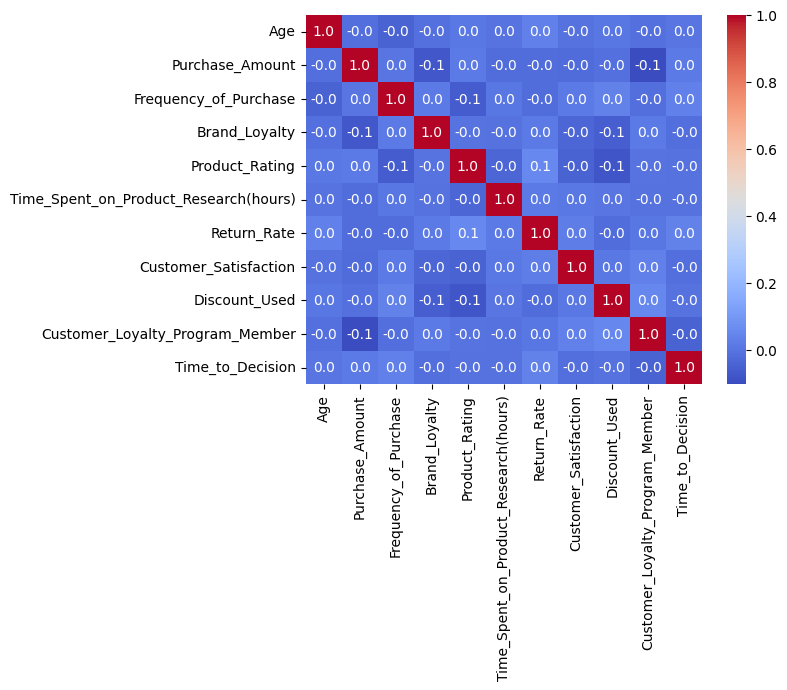

____________________________________________________________________________________________________

Kendall Correlation:
                                            Age  Purchase_Amount  \
Age                                    1.000000        -0.010344   
Purchase_Amount                       -0.010344         1.000000   
Frequency_of_Purchase                 -0.033008         0.001602   
Brand_Loyalty                         -0.009284        -0.055397   
Product_Rating                         0.007623         0.010790   
Time_Spent_on_Product_Research(hours) -0.000181        -0.015629   
Return_Rate                            0.024214        -0.015743   
Customer_Satisfaction                 -0.003398        -0.015637   
Discount_Used                          0.006184        -0.006699   
Customer_Loyalty_Program_Member       -0.008177        -0.084095   
Time_to_Decision                       0.003029         0.009517   

                                       Frequency_of_Purchase

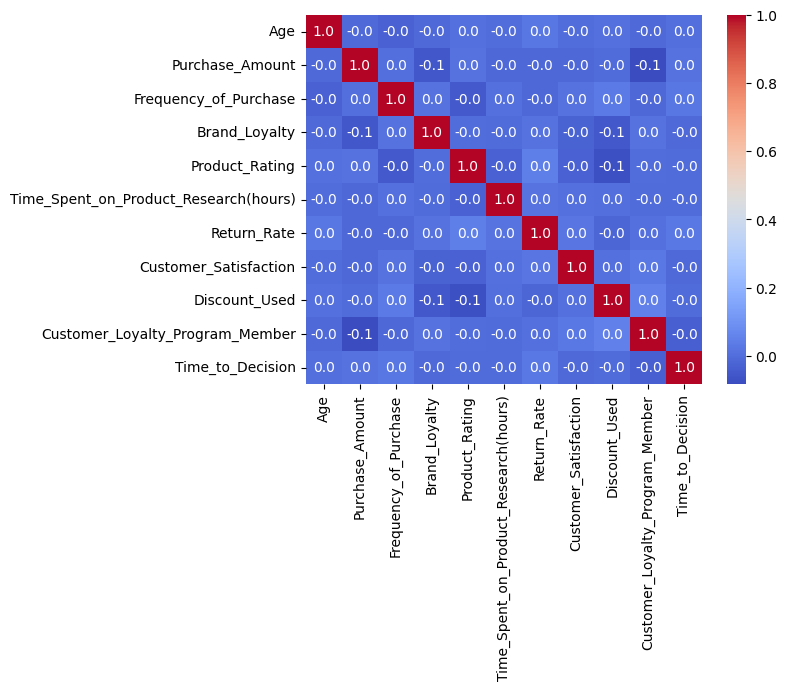

In [245]:
correlation_check(df)

In [ ]:
# Data totally uncorrelated, as demonstrated by both methods

In [ ]:
# Since data is totally uncorrelated and does not follow normal distribution, ensemble algos seem to be a better option,

In [ ]:
# let's use Random Forest Regressor to try to predict a chosen variable

In [284]:
X = df.drop('Purchase_Amount', axis=1)
y = df['Purchase_Amount']

In [ ]:
# Encoding categorical data

In [285]:
label_encoders = {}

for col in X.select_dtypes(include='object').columns:
    label_encoders[col] = LabelEncoder()
    X[col] = X[col].astype(str)
    X[col] = label_encoders[col].fit_transform(X[col])

In [287]:
X.head()

,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Category,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,22,2,1,1,0,1,9,4,1,5,...,7,3,2,1,142,True,False,1,1,2
1,49,5,0,1,1,0,7,11,0,3,...,5,0,2,4,179,True,False,3,2,6
2,24,2,1,2,2,0,18,2,1,5,...,7,1,1,2,148,True,True,0,1,3
3,29,2,1,2,2,1,13,6,1,3,...,1,3,1,3,53,True,True,1,0,10
4,33,2,1,3,1,1,8,6,1,3,...,10,3,1,2,23,False,False,3,1,4


In [ ]:
# Scaling via MinMaxScaler, a better fit since data does not follow normal distribution

In [288]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
# Not gonna tweak the regressor, let's just see how it performs as is

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [ ]:
# Three different evaluation metrics to gauge performance

In [290]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 18364.17828060055
Mean Absolute Error: 117.58448449999997
R-squared: -0.05459230916216806


In [ ]:
# By all three metrics Random Forest Regressor performed attrociously poor

In [ ]:
# The analysis of importance by each feature only confirms the above

In [291]:
feature_importance = rf_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
                                  Feature  Importance
19                       Time_of_Purchase    0.121516
0                                     Age    0.094137
6                       Purchase_Category    0.087517
24                       Time_to_Decision    0.073034
7                   Frequency_of_Purchase    0.057996
15                  Customer_Satisfaction    0.051999
18                         Payment_Method    0.043592
9                           Brand_Loyalty    0.041151
10                         Product_Rating    0.040460
22                        Purchase_Intent    0.038130
3                          Marital_Status    0.031440
12                 Social_Media_Influence    0.030026
16                    Engagement_with_Ads    0.028207
1                                  Gender    0.027487
8                        Purchase_Channel    0.026573
4                         Education_Level    0.026315
11  Time_Spent_on_Product_Research(hours)    0.025868
17     

In [ ]:
# Since Random Forest Regressor performed so poorly, let's try XGBoost, with two objectives for comparison

In [297]:
def xgb_regressors():
    objectives = ['reg:absoluteerror', 'reg:squarederror']
    for objective in objectives:
        xgb_regressor = xgb.XGBRegressor(objective=objective, random_state=42)
        xgb_regressor.fit(X_train, y_train)
        y_pred = xgb_regressor.predict(X_test)
        if objective == 'reg:absoluteerror':
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            print(f"XGBoost Mean Absolute Error: {mae}")
            print(f"XGBoost R-squared for MAE: {r2}")
        elif objective == 'reg:squarederror':
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            print(f"XGBoost Mean Squared Error: {mse}")
            print(f"XGBoost R-squared for MSE: {r2}")

        feature_importance = xgb_regressor.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        print(f"\nXGBoost Feature Importance ({objective}):")
        print(f"{feature_importance_df} \n")
    

In [298]:
xgb_regressors()

XGBoost Mean Absolute Error: 127.44496607208252
XGBoost R-squared for MAE: -0.28853674343969105

XGBoost Feature Importance (reg:absoluteerror):
                                  Feature  Importance
17               Device_Used_for_Shopping    0.044401
21        Customer_Loyalty_Program_Member    0.043024
19                       Time_of_Purchase    0.042658
18                         Payment_Method    0.042314
22                        Purchase_Intent    0.041968
23                    Shipping_Preference    0.041851
20                          Discount_Used    0.041804
24                       Time_to_Decision    0.041716
16                    Engagement_with_Ads    0.041690
8                        Purchase_Channel    0.041606
15                  Customer_Satisfaction    0.041330
9                           Brand_Loyalty    0.041023
7                   Frequency_of_Purchase    0.040085
6                       Purchase_Category    0.039652
10                         Product_Rating    

In [ ]:
# XGBoost performed even worse by every parameter

In [ ]:
# Given the nature of our dataset, it does not make sense to use a simple Linear Regression, but let's do it anyway and see what happens

In [299]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

In [300]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression Mean Absolute Error: {mae}")
print(f"Linear Regression R-squared: {r2}")

Linear Regression Mean Squared Error: 16984.584655634913
Linear Regression Mean Absolute Error: 112.90340056326299
Linear Regression R-squared: 0.0246330612533896


In [301]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_regressor.coef_})
print("\nCoefficients:")
print(coefficients)
intercept = linear_regressor.intercept_
print(f'\nIntercept: {intercept}')


Coefficients:
                                  Feature  Coefficient
0                                     Age    -5.479947
1                                  Gender    -4.122651
2                            Income_Level    -4.562449
3                          Marital_Status    -3.662490
4                         Education_Level   -10.071729
5                              Occupation     3.427130
6                       Purchase_Category    38.928611
7                   Frequency_of_Purchase     1.128298
8                        Purchase_Channel    -2.394122
9                           Brand_Loyalty   -33.725865
10                         Product_Rating     2.863243
11  Time_Spent_on_Product_Research(hours)    -1.991528
12                 Social_Media_Influence   -15.804077
13                   Discount_Sensitivity    -0.772061
14                            Return_Rate    -8.475130
15                  Customer_Satisfaction    -8.030131
16                    Engagement_with_Ads    -6.10

In [ ]:
# Performs also attrociously poor, as expected

In [ ]:
# Let's add some cross-validation to see whether or not the algos are under or overfitting the data

In [305]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
rf_results = cross_validate(rf_regressor, X, y, cv=cv, scoring=['r2', 'neg_mean_squared_error'], return_train_score=True)
xgb_results = cross_validate(xgb_regressor, X, y, cv=cv, scoring=['r2', 'neg_mean_squared_error'], return_train_score=True)
linear_results = cross_validate(linear_regressor, X, y, cv=cv, scoring=['r2', 'neg_mean_squared_error'], return_train_score=True)

print("Random Forest Results:")
print(rf_results)
print("XGBoost Results:")
print(xgb_results)
print("Linear Regression Results:")
print(linear_results)

Random Forest Results:
{'fit_time': array([0.70358396, 0.70027089, 0.7088306 , 0.6752367 , 0.70825338]), 'score_time': array([0.01478052, 0.0164392 , 0.0131731 , 0.01372623, 0.01305747]), 'test_r2': array([-0.07223301, -0.02481493, -0.02334678, -0.05963702, -0.06486659]), 'train_r2': array([0.85367352, 0.85367652, 0.85181778, 0.8547496 , 0.85864592]), 'test_neg_mean_squared_error': array([-18671.36515454, -17684.62415412, -17608.75622057, -17168.44754196,
       -19251.70719216]), 'train_neg_mean_squared_error': array([-2522.24678109, -2529.99264591, -2562.89091294, -2549.55737318,
       -2406.69298156])}
XGBoost Results:
{'fit_time': array([0.12535071, 0.13246012, 0.17073607, 0.13064885, 0.13112879]), 'score_time': array([0.0110805 , 0.00976062, 0.0108614 , 0.01093364, 0.01089478]), 'test_r2': array([-0.28853674, -0.24106863, -0.27743781, -0.23479843, -0.18761284]), 'train_r2': array([0.90488356, 0.91547077, 0.91169729, 0.90668461, 0.90275872]), 'test_neg_mean_squared_error': array([

In [ ]:
# Random Forest and XGBoost are clearly overfitting. Linear Regression never made sense in first place

In [ ]:
# Let's try some regularization on Random Forest and see what happens. Using Grid Search to fine-tune hyperparameters

In [307]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(rf_regressor, param_grid, cv=cv, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5}
Best R-squared: -0.0037849767707553773


In [ ]:
# Still horrible. The problem is clearly with the dataset itself, see how the tree does not even

In [ ]:
# want to go much deep into it, nor wants to gather many samples per node.

In [ ]:
# No wonder, since it's all made up data!